## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import friedman3Dataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np

## Import Dataset 


In [3]:
n_features = 4
n_samples= 100
n_target = 1
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  68.002251   652.604031  0.130858   2.120963  0.770158
1  70.668151   726.262143  0.930007   1.487260  1.517557
2  31.414568  1481.978438  0.863289  10.560127  1.627903
3  11.359919  1264.444202  0.653821   1.914697  1.571910
4  35.276516  1307.443983  0.863712   2.273615  1.448919


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)

print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(80, 4)
(80,)
(20, 4)
(20,)


## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.546
Model:                            OLS   Adj. R-squared (uncentered):              0.522
Method:                 Least Squares   F-statistic:                              22.83
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                    2.06e-12
Time:                        16:18:38   Log-Likelihood:                         -87.294
No. Observations:                  80   AIC:                                      182.6
Df Residuals:                      76   BIC:                                      192.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

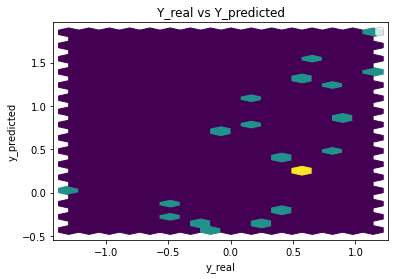

Performance Metrics
Mean Squared Error: 0.3635141544662107
Mean Absolute Error: 0.4979525731192089
Manhattan distance: 9.959051462384178
Euclidean distance: 2.6963462480408955


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)

Learning rate set to 0.027471
0:	learn: 1.0548223	total: 52.9ms	remaining: 52.8s
1:	learn: 1.0415167	total: 54.1ms	remaining: 27s
2:	learn: 1.0290905	total: 55.1ms	remaining: 18.3s
3:	learn: 1.0162042	total: 56.1ms	remaining: 14s
4:	learn: 1.0020573	total: 56.7ms	remaining: 11.3s
5:	learn: 0.9905421	total: 57.4ms	remaining: 9.51s
6:	learn: 0.9796671	total: 58.1ms	remaining: 8.24s
7:	learn: 0.9671964	total: 58.8ms	remaining: 7.29s
8:	learn: 0.9541652	total: 59.5ms	remaining: 6.55s
9:	learn: 0.9400659	total: 60.1ms	remaining: 5.95s
10:	learn: 0.9311455	total: 60.6ms	remaining: 5.45s
11:	learn: 0.9194402	total: 61.1ms	remaining: 5.03s
12:	learn: 0.9098837	total: 61.8ms	remaining: 4.69s
13:	learn: 0.8984266	total: 62.3ms	remaining: 4.39s
14:	learn: 0.8882848	total: 62.8ms	remaining: 4.13s
15:	learn: 0.8796875	total: 63.4ms	remaining: 3.9s
16:	learn: 0.8694418	total: 63.8ms	remaining: 3.69s
17:	learn: 0.8589804	total: 64.3ms	remaining: 3.51s
18:	learn: 0.8487816	total: 65.2ms	remaining: 3.3

89:	learn: 0.4513663	total: 104ms	remaining: 1.05s
90:	learn: 0.4478005	total: 105ms	remaining: 1.05s
91:	learn: 0.4439900	total: 105ms	remaining: 1.04s
92:	learn: 0.4414170	total: 106ms	remaining: 1.03s
93:	learn: 0.4378947	total: 106ms	remaining: 1.02s
94:	learn: 0.4340892	total: 107ms	remaining: 1.02s
95:	learn: 0.4298659	total: 107ms	remaining: 1.01s
96:	learn: 0.4267822	total: 108ms	remaining: 1s
97:	learn: 0.4234769	total: 108ms	remaining: 997ms
98:	learn: 0.4207223	total: 109ms	remaining: 993ms
99:	learn: 0.4178022	total: 110ms	remaining: 993ms
100:	learn: 0.4145058	total: 111ms	remaining: 986ms
101:	learn: 0.4113934	total: 111ms	remaining: 981ms
102:	learn: 0.4085678	total: 112ms	remaining: 974ms
103:	learn: 0.4052060	total: 112ms	remaining: 967ms
104:	learn: 0.4018683	total: 117ms	remaining: 994ms
105:	learn: 0.3993240	total: 117ms	remaining: 989ms
106:	learn: 0.3967711	total: 118ms	remaining: 984ms
107:	learn: 0.3940950	total: 119ms	remaining: 983ms
108:	learn: 0.3910574	tota

160:	learn: 0.2844181	total: 159ms	remaining: 830ms
161:	learn: 0.2828263	total: 167ms	remaining: 862ms
162:	learn: 0.2812679	total: 168ms	remaining: 861ms
163:	learn: 0.2796464	total: 169ms	remaining: 861ms
164:	learn: 0.2785552	total: 170ms	remaining: 861ms
165:	learn: 0.2776269	total: 171ms	remaining: 859ms
166:	learn: 0.2763982	total: 176ms	remaining: 878ms
167:	learn: 0.2746676	total: 178ms	remaining: 880ms
168:	learn: 0.2729025	total: 179ms	remaining: 880ms
169:	learn: 0.2710801	total: 180ms	remaining: 879ms
170:	learn: 0.2696814	total: 181ms	remaining: 879ms
171:	learn: 0.2680162	total: 185ms	remaining: 888ms
172:	learn: 0.2669543	total: 185ms	remaining: 885ms
173:	learn: 0.2650205	total: 190ms	remaining: 903ms
174:	learn: 0.2638964	total: 191ms	remaining: 899ms
175:	learn: 0.2620890	total: 191ms	remaining: 896ms
176:	learn: 0.2608568	total: 192ms	remaining: 892ms
177:	learn: 0.2587947	total: 193ms	remaining: 892ms
178:	learn: 0.2575947	total: 194ms	remaining: 889ms
179:	learn: 

198:	learn: 0.2299580	total: 249ms	remaining: 1s
199:	learn: 0.2288431	total: 262ms	remaining: 1.05s
200:	learn: 0.2276902	total: 273ms	remaining: 1.08s
201:	learn: 0.2263292	total: 281ms	remaining: 1.11s
202:	learn: 0.2252948	total: 282ms	remaining: 1.1s
203:	learn: 0.2240486	total: 282ms	remaining: 1.1s
204:	learn: 0.2226965	total: 283ms	remaining: 1.1s
205:	learn: 0.2214151	total: 284ms	remaining: 1.09s
206:	learn: 0.2204197	total: 284ms	remaining: 1.09s
207:	learn: 0.2195467	total: 285ms	remaining: 1.08s
208:	learn: 0.2182499	total: 286ms	remaining: 1.08s
209:	learn: 0.2168373	total: 286ms	remaining: 1.08s
210:	learn: 0.2157321	total: 287ms	remaining: 1.07s
211:	learn: 0.2146157	total: 290ms	remaining: 1.08s
212:	learn: 0.2130963	total: 292ms	remaining: 1.08s
213:	learn: 0.2118229	total: 294ms	remaining: 1.08s
214:	learn: 0.2106852	total: 296ms	remaining: 1.08s
215:	learn: 0.2094610	total: 297ms	remaining: 1.08s
216:	learn: 0.2083559	total: 297ms	remaining: 1.07s
217:	learn: 0.2068

218:	learn: 0.2056516	total: 301ms	remaining: 1.07s
219:	learn: 0.2044378	total: 304ms	remaining: 1.08s
220:	learn: 0.2034579	total: 305ms	remaining: 1.07s
221:	learn: 0.2025039	total: 306ms	remaining: 1.07s
222:	learn: 0.2013917	total: 307ms	remaining: 1.07s
223:	learn: 0.2005034	total: 307ms	remaining: 1.06s
224:	learn: 0.1996763	total: 308ms	remaining: 1.06s
225:	learn: 0.1984503	total: 308ms	remaining: 1.06s
226:	learn: 0.1972724	total: 310ms	remaining: 1.05s
227:	learn: 0.1962334	total: 311ms	remaining: 1.05s
228:	learn: 0.1949676	total: 312ms	remaining: 1.05s
229:	learn: 0.1939568	total: 312ms	remaining: 1.04s
230:	learn: 0.1929726	total: 313ms	remaining: 1.04s
231:	learn: 0.1919514	total: 314ms	remaining: 1.04s
232:	learn: 0.1907030	total: 315ms	remaining: 1.04s
233:	learn: 0.1897242	total: 315ms	remaining: 1.03s
234:	learn: 0.1887423	total: 316ms	remaining: 1.03s
235:	learn: 0.1876446	total: 318ms	remaining: 1.03s
236:	learn: 0.1867417	total: 319ms	remaining: 1.03s
237:	learn: 

294:	learn: 0.1461803	total: 386ms	remaining: 924ms
295:	learn: 0.1458744	total: 387ms	remaining: 921ms
296:	learn: 0.1452440	total: 388ms	remaining: 919ms
297:	learn: 0.1442815	total: 389ms	remaining: 915ms
298:	learn: 0.1440167	total: 389ms	remaining: 912ms
299:	learn: 0.1430871	total: 390ms	remaining: 909ms
300:	learn: 0.1422574	total: 393ms	remaining: 912ms
301:	learn: 0.1414497	total: 393ms	remaining: 909ms
302:	learn: 0.1410338	total: 394ms	remaining: 906ms
303:	learn: 0.1405734	total: 394ms	remaining: 903ms
304:	learn: 0.1396748	total: 395ms	remaining: 900ms
305:	learn: 0.1390960	total: 396ms	remaining: 898ms
306:	learn: 0.1386843	total: 398ms	remaining: 899ms
307:	learn: 0.1383856	total: 399ms	remaining: 897ms
308:	learn: 0.1381470	total: 400ms	remaining: 894ms
309:	learn: 0.1373832	total: 400ms	remaining: 891ms
310:	learn: 0.1366383	total: 401ms	remaining: 889ms
311:	learn: 0.1359555	total: 402ms	remaining: 886ms
312:	learn: 0.1357201	total: 402ms	remaining: 883ms
313:	learn: 

334:	learn: 0.1255490	total: 495ms	remaining: 983ms
335:	learn: 0.1249762	total: 496ms	remaining: 980ms
336:	learn: 0.1242386	total: 496ms	remaining: 977ms
337:	learn: 0.1240583	total: 497ms	remaining: 973ms
338:	learn: 0.1238844	total: 497ms	remaining: 970ms
339:	learn: 0.1232698	total: 504ms	remaining: 979ms
340:	learn: 0.1225367	total: 507ms	remaining: 981ms
341:	learn: 0.1218820	total: 509ms	remaining: 979ms
342:	learn: 0.1211749	total: 510ms	remaining: 977ms
343:	learn: 0.1205869	total: 511ms	remaining: 974ms
344:	learn: 0.1198968	total: 512ms	remaining: 971ms
345:	learn: 0.1190893	total: 512ms	remaining: 969ms
346:	learn: 0.1182974	total: 514ms	remaining: 967ms
347:	learn: 0.1176267	total: 515ms	remaining: 964ms
348:	learn: 0.1168564	total: 515ms	remaining: 961ms
349:	learn: 0.1160709	total: 516ms	remaining: 958ms
350:	learn: 0.1153277	total: 516ms	remaining: 954ms
351:	learn: 0.1145990	total: 517ms	remaining: 951ms
352:	learn: 0.1136939	total: 517ms	remaining: 948ms
353:	learn: 

387:	learn: 0.0971724	total: 549ms	remaining: 866ms
388:	learn: 0.0968935	total: 552ms	remaining: 867ms
389:	learn: 0.0966219	total: 552ms	remaining: 864ms
390:	learn: 0.0960613	total: 553ms	remaining: 861ms
391:	learn: 0.0958466	total: 554ms	remaining: 859ms
392:	learn: 0.0952902	total: 554ms	remaining: 856ms
393:	learn: 0.0950973	total: 555ms	remaining: 853ms
394:	learn: 0.0945202	total: 556ms	remaining: 852ms
395:	learn: 0.0943349	total: 557ms	remaining: 850ms
396:	learn: 0.0941550	total: 558ms	remaining: 848ms
397:	learn: 0.0936142	total: 559ms	remaining: 845ms
398:	learn: 0.0930904	total: 559ms	remaining: 843ms
399:	learn: 0.0929166	total: 560ms	remaining: 840ms
400:	learn: 0.0923726	total: 560ms	remaining: 837ms
401:	learn: 0.0922150	total: 561ms	remaining: 834ms
402:	learn: 0.0917513	total: 561ms	remaining: 831ms
403:	learn: 0.0912780	total: 562ms	remaining: 828ms
404:	learn: 0.0908310	total: 562ms	remaining: 826ms
405:	learn: 0.0903549	total: 563ms	remaining: 823ms
406:	learn: 

531:	learn: 0.0604493	total: 652ms	remaining: 573ms
532:	learn: 0.0600278	total: 654ms	remaining: 573ms
533:	learn: 0.0598552	total: 655ms	remaining: 571ms
534:	learn: 0.0596684	total: 655ms	remaining: 569ms
535:	learn: 0.0592595	total: 655ms	remaining: 567ms
536:	learn: 0.0590781	total: 656ms	remaining: 566ms
537:	learn: 0.0589084	total: 657ms	remaining: 564ms
538:	learn: 0.0585419	total: 658ms	remaining: 563ms
539:	learn: 0.0583082	total: 658ms	remaining: 561ms
540:	learn: 0.0581987	total: 659ms	remaining: 559ms
541:	learn: 0.0578082	total: 660ms	remaining: 558ms
542:	learn: 0.0576441	total: 661ms	remaining: 556ms
543:	learn: 0.0574737	total: 661ms	remaining: 554ms
544:	learn: 0.0571240	total: 663ms	remaining: 554ms
545:	learn: 0.0569046	total: 664ms	remaining: 552ms
546:	learn: 0.0567974	total: 664ms	remaining: 550ms
547:	learn: 0.0564530	total: 665ms	remaining: 548ms
548:	learn: 0.0563482	total: 665ms	remaining: 546ms
549:	learn: 0.0559764	total: 666ms	remaining: 545ms
550:	learn: 

625:	learn: 0.0420043	total: 712ms	remaining: 425ms
626:	learn: 0.0419357	total: 713ms	remaining: 424ms
627:	learn: 0.0418210	total: 713ms	remaining: 423ms
628:	learn: 0.0415858	total: 714ms	remaining: 421ms
629:	learn: 0.0413873	total: 714ms	remaining: 419ms
630:	learn: 0.0412455	total: 715ms	remaining: 418ms
631:	learn: 0.0410509	total: 715ms	remaining: 416ms
632:	learn: 0.0409688	total: 717ms	remaining: 415ms
633:	learn: 0.0408225	total: 717ms	remaining: 414ms
634:	learn: 0.0406756	total: 717ms	remaining: 412ms
635:	learn: 0.0406099	total: 718ms	remaining: 411ms
636:	learn: 0.0404640	total: 719ms	remaining: 410ms
637:	learn: 0.0404001	total: 720ms	remaining: 408ms
638:	learn: 0.0402627	total: 720ms	remaining: 407ms
639:	learn: 0.0401599	total: 720ms	remaining: 405ms
640:	learn: 0.0400735	total: 721ms	remaining: 404ms
641:	learn: 0.0398852	total: 721ms	remaining: 402ms
642:	learn: 0.0398232	total: 722ms	remaining: 401ms
643:	learn: 0.0396902	total: 722ms	remaining: 399ms
644:	learn: 

775:	learn: 0.0262911	total: 807ms	remaining: 233ms
776:	learn: 0.0262366	total: 807ms	remaining: 232ms
777:	learn: 0.0261950	total: 808ms	remaining: 231ms
778:	learn: 0.0261415	total: 811ms	remaining: 230ms
779:	learn: 0.0260949	total: 812ms	remaining: 229ms
780:	learn: 0.0260543	total: 813ms	remaining: 228ms
781:	learn: 0.0260077	total: 813ms	remaining: 227ms
782:	learn: 0.0259677	total: 814ms	remaining: 226ms
783:	learn: 0.0258898	total: 814ms	remaining: 224ms
784:	learn: 0.0258291	total: 815ms	remaining: 223ms
785:	learn: 0.0257900	total: 816ms	remaining: 222ms
786:	learn: 0.0257516	total: 817ms	remaining: 221ms
787:	learn: 0.0256758	total: 818ms	remaining: 220ms
788:	learn: 0.0256015	total: 818ms	remaining: 219ms
789:	learn: 0.0255406	total: 819ms	remaining: 218ms
790:	learn: 0.0254774	total: 820ms	remaining: 217ms
791:	learn: 0.0254295	total: 823ms	remaining: 216ms
792:	learn: 0.0253870	total: 823ms	remaining: 215ms
793:	learn: 0.0253118	total: 824ms	remaining: 214ms
794:	learn: 

843:	learn: 0.0219106	total: 862ms	remaining: 159ms
844:	learn: 0.0218730	total: 862ms	remaining: 158ms
845:	learn: 0.0218361	total: 863ms	remaining: 157ms
846:	learn: 0.0217898	total: 866ms	remaining: 156ms
847:	learn: 0.0217085	total: 866ms	remaining: 155ms
848:	learn: 0.0216285	total: 867ms	remaining: 154ms
849:	learn: 0.0215827	total: 867ms	remaining: 153ms
850:	learn: 0.0215258	total: 870ms	remaining: 152ms
851:	learn: 0.0214905	total: 870ms	remaining: 151ms
852:	learn: 0.0213994	total: 872ms	remaining: 150ms
853:	learn: 0.0213179	total: 872ms	remaining: 149ms
854:	learn: 0.0212563	total: 874ms	remaining: 148ms
855:	learn: 0.0212252	total: 875ms	remaining: 147ms
856:	learn: 0.0211902	total: 875ms	remaining: 146ms
857:	learn: 0.0211110	total: 878ms	remaining: 145ms
858:	learn: 0.0210508	total: 878ms	remaining: 144ms
859:	learn: 0.0210168	total: 879ms	remaining: 143ms
860:	learn: 0.0209833	total: 879ms	remaining: 142ms
861:	learn: 0.0209388	total: 879ms	remaining: 141ms
862:	learn: 

902:	learn: 0.0187678	total: 938ms	remaining: 101ms
903:	learn: 0.0187408	total: 938ms	remaining: 99.6ms
904:	learn: 0.0187143	total: 939ms	remaining: 98.5ms
905:	learn: 0.0186774	total: 939ms	remaining: 97.4ms
906:	learn: 0.0185979	total: 940ms	remaining: 96.3ms
907:	learn: 0.0185486	total: 942ms	remaining: 95.5ms
908:	learn: 0.0184712	total: 943ms	remaining: 94.4ms
909:	learn: 0.0184203	total: 943ms	remaining: 93.3ms
910:	learn: 0.0183682	total: 944ms	remaining: 92.2ms
911:	learn: 0.0183421	total: 944ms	remaining: 91.1ms
912:	learn: 0.0183068	total: 945ms	remaining: 90ms
913:	learn: 0.0182798	total: 945ms	remaining: 88.9ms
914:	learn: 0.0182460	total: 946ms	remaining: 87.8ms
915:	learn: 0.0182068	total: 946ms	remaining: 86.8ms
916:	learn: 0.0181595	total: 950ms	remaining: 86ms
917:	learn: 0.0180846	total: 952ms	remaining: 85ms
918:	learn: 0.0180462	total: 954ms	remaining: 84.1ms
919:	learn: 0.0180182	total: 963ms	remaining: 83.8ms
920:	learn: 0.0179802	total: 964ms	remaining: 82.7ms


946:	learn: 0.0168794	total: 983ms	remaining: 55ms
947:	learn: 0.0168461	total: 983ms	remaining: 53.9ms
948:	learn: 0.0168227	total: 984ms	remaining: 52.9ms
949:	learn: 0.0167889	total: 986ms	remaining: 51.9ms
950:	learn: 0.0167658	total: 986ms	remaining: 50.8ms
951:	learn: 0.0166993	total: 987ms	remaining: 49.7ms
952:	learn: 0.0166359	total: 987ms	remaining: 48.7ms
953:	learn: 0.0165742	total: 988ms	remaining: 47.6ms
954:	learn: 0.0165384	total: 988ms	remaining: 46.6ms
955:	learn: 0.0165158	total: 989ms	remaining: 45.5ms
956:	learn: 0.0164531	total: 989ms	remaining: 44.4ms
957:	learn: 0.0164283	total: 989ms	remaining: 43.4ms
958:	learn: 0.0164039	total: 990ms	remaining: 42.3ms
959:	learn: 0.0163712	total: 990ms	remaining: 41.3ms
960:	learn: 0.0163369	total: 991ms	remaining: 40.2ms
961:	learn: 0.0162684	total: 991ms	remaining: 39.2ms
962:	learn: 0.0162331	total: 992ms	remaining: 38.1ms
963:	learn: 0.0162088	total: 992ms	remaining: 37.1ms
964:	learn: 0.0161822	total: 993ms	remaining: 36

# TabNet regressor

In [7]:
n_epochs = 1000
batch_size = 32

(80,)
Device used : cpu


epoch 0  | loss: 1.3695  | train_mse: 11.08876| train_mae: 2.22282 |  0:00:01s
epoch 1  | loss: 0.75994 | train_mse: 3.40003 | train_mae: 1.39371 |  0:00:01s


epoch 2  | loss: 0.695   | train_mse: 2.35374 | train_mae: 1.13583 |  0:00:02s
epoch 3  | loss: 1.0001  | train_mse: 6.09666 | train_mae: 1.70896 |  0:00:02s


epoch 4  | loss: 0.52205 | train_mse: 2.25701 | train_mae: 1.14206 |  0:00:02s
epoch 5  | loss: 0.66306 | train_mse: 1.02705 | train_mae: 0.79654 |  0:00:02s


epoch 6  | loss: 0.45644 | train_mse: 1.48767 | train_mae: 0.91128 |  0:00:02s
epoch 7  | loss: 0.48324 | train_mse: 2.04789 | train_mae: 1.01981 |  0:00:02s


epoch 8  | loss: 0.4522  | train_mse: 2.0703  | train_mae: 1.03837 |  0:00:02s
epoch 9  | loss: 0.45499 | train_mse: 1.42906 | train_mae: 0.85163 |  0:00:03s


epoch 10 | loss: 0.35953 | train_mse: 1.03547 | train_mae: 0.65576 |  0:00:03s
epoch 11 | loss: 0.43464 | train_mse: 0.8519  | train_mae: 0.60443 |  0:00:03s


epoch 12 | loss: 0.5611  | train_mse: 1.07487 | train_mae: 0.65552 |  0:00:03s
epoch 13 | loss: 0.27762 | train_mse: 1.18098 | train_mae: 0.6448  |  0:00:03s
epoch 14 | loss: 0.42724 | train_mse: 0.76717 | train_mae: 0.567   |  0:00:03s


epoch 15 | loss: 0.25955 | train_mse: 0.26862 | train_mae: 0.39651 |  0:00:03s
epoch 16 | loss: 0.39033 | train_mse: 0.46867 | train_mae: 0.46567 |  0:00:03s
epoch 17 | loss: 0.61007 | train_mse: 0.21753 | train_mae: 0.35909 |  0:00:03s


epoch 18 | loss: 0.48894 | train_mse: 0.30423 | train_mae: 0.39903 |  0:00:03s
epoch 19 | loss: 0.35606 | train_mse: 0.54652 | train_mae: 0.5175  |  0:00:04s
epoch 20 | loss: 0.43809 | train_mse: 0.55234 | train_mae: 0.53137 |  0:00:04s


epoch 21 | loss: 0.26644 | train_mse: 0.49032 | train_mae: 0.47543 |  0:00:04s
epoch 22 | loss: 0.20404 | train_mse: 0.53169 | train_mae: 0.46748 |  0:00:04s
epoch 23 | loss: 0.23264 | train_mse: 0.58234 | train_mae: 0.50541 |  0:00:04s


epoch 24 | loss: 0.27238 | train_mse: 0.51198 | train_mae: 0.49022 |  0:00:04s


epoch 25 | loss: 0.28623 | train_mse: 0.40357 | train_mae: 0.45699 |  0:00:04s
epoch 26 | loss: 0.20764 | train_mse: 0.22495 | train_mae: 0.36978 |  0:00:04s


epoch 27 | loss: 0.21856 | train_mse: 0.18786 | train_mae: 0.33525 |  0:00:04s


epoch 28 | loss: 0.23486 | train_mse: 0.21561 | train_mae: 0.34986 |  0:00:05s


epoch 29 | loss: 0.23499 | train_mse: 0.28939 | train_mae: 0.39901 |  0:00:05s
epoch 30 | loss: 0.18345 | train_mse: 0.28515 | train_mae: 0.41098 |  0:00:05s


epoch 31 | loss: 0.28566 | train_mse: 0.33326 | train_mae: 0.42746 |  0:00:05s
epoch 32 | loss: 0.26614 | train_mse: 0.41616 | train_mae: 0.46484 |  0:00:05s
epoch 33 | loss: 0.13866 | train_mse: 0.27331 | train_mae: 0.39746 |  0:00:05s


epoch 34 | loss: 0.15419 | train_mse: 0.16407 | train_mae: 0.32254 |  0:00:06s
epoch 35 | loss: 0.1586  | train_mse: 0.18646 | train_mae: 0.34149 |  0:00:06s


epoch 36 | loss: 0.16188 | train_mse: 0.21677 | train_mae: 0.36856 |  0:00:06s
epoch 37 | loss: 0.2017  | train_mse: 0.24768 | train_mae: 0.38606 |  0:00:06s
epoch 38 | loss: 0.22826 | train_mse: 0.22991 | train_mae: 0.36147 |  0:00:06s


epoch 39 | loss: 0.16653 | train_mse: 0.19874 | train_mae: 0.33088 |  0:00:06s
epoch 40 | loss: 0.12816 | train_mse: 0.17275 | train_mae: 0.3128  |  0:00:06s
epoch 41 | loss: 0.15949 | train_mse: 0.15164 | train_mae: 0.29978 |  0:00:06s


epoch 42 | loss: 0.12005 | train_mse: 0.15136 | train_mae: 0.298   |  0:00:06s
epoch 43 | loss: 0.2268  | train_mse: 0.11568 | train_mae: 0.26039 |  0:00:06s
epoch 44 | loss: 0.2259  | train_mse: 0.10989 | train_mae: 0.25196 |  0:00:07s


epoch 45 | loss: 0.1092  | train_mse: 0.12967 | train_mae: 0.28373 |  0:00:07s
epoch 46 | loss: 0.10892 | train_mse: 0.15379 | train_mae: 0.31148 |  0:00:07s
epoch 47 | loss: 0.15514 | train_mse: 0.12977 | train_mae: 0.29099 |  0:00:07s
epoch 48 | loss: 0.20822 | train_mse: 0.09812 | train_mae: 0.23804 |  0:00:07s


epoch 49 | loss: 0.12838 | train_mse: 0.09667 | train_mae: 0.22998 |  0:00:07s
epoch 50 | loss: 0.11877 | train_mse: 0.09681 | train_mae: 0.23123 |  0:00:07s
epoch 51 | loss: 0.14145 | train_mse: 0.09511 | train_mae: 0.23823 |  0:00:07s


epoch 52 | loss: 0.12327 | train_mse: 0.09208 | train_mae: 0.233   |  0:00:07s
epoch 53 | loss: 0.1969  | train_mse: 0.0935  | train_mae: 0.23711 |  0:00:07s
epoch 54 | loss: 0.17343 | train_mse: 0.10256 | train_mae: 0.24985 |  0:00:07s


epoch 55 | loss: 0.15475 | train_mse: 0.09501 | train_mae: 0.24662 |  0:00:07s
epoch 56 | loss: 0.11363 | train_mse: 0.09793 | train_mae: 0.25206 |  0:00:07s
epoch 57 | loss: 0.14658 | train_mse: 0.10337 | train_mae: 0.26438 |  0:00:07s
epoch 58 | loss: 0.12006 | train_mse: 0.0947  | train_mae: 0.2517  |  0:00:08s


epoch 59 | loss: 0.20077 | train_mse: 0.09546 | train_mae: 0.25052 |  0:00:08s
epoch 60 | loss: 0.11364 | train_mse: 0.08702 | train_mae: 0.23149 |  0:00:08s
epoch 61 | loss: 0.10146 | train_mse: 0.09184 | train_mae: 0.23477 |  0:00:08s
epoch 62 | loss: 0.29048 | train_mse: 0.09095 | train_mae: 0.23775 |  0:00:08s


epoch 63 | loss: 0.15541 | train_mse: 0.09689 | train_mae: 0.24559 |  0:00:08s
epoch 64 | loss: 0.19885 | train_mse: 0.08531 | train_mae: 0.22694 |  0:00:08s
epoch 65 | loss: 0.13984 | train_mse: 0.08183 | train_mae: 0.2236  |  0:00:08s


epoch 66 | loss: 0.08845 | train_mse: 0.0811  | train_mae: 0.22628 |  0:00:08s
epoch 67 | loss: 0.10637 | train_mse: 0.08448 | train_mae: 0.22989 |  0:00:08s
epoch 68 | loss: 0.10037 | train_mse: 0.08721 | train_mae: 0.23312 |  0:00:08s


epoch 69 | loss: 0.23505 | train_mse: 0.13272 | train_mae: 0.27628 |  0:00:08s
epoch 70 | loss: 0.15737 | train_mse: 0.15326 | train_mae: 0.28858 |  0:00:09s
epoch 71 | loss: 0.1206  | train_mse: 0.18013 | train_mae: 0.30568 |  0:00:09s


epoch 72 | loss: 0.11153 | train_mse: 0.16077 | train_mae: 0.29044 |  0:00:09s
epoch 73 | loss: 0.20198 | train_mse: 0.1211  | train_mae: 0.26136 |  0:00:09s


epoch 74 | loss: 0.10503 | train_mse: 0.09249 | train_mae: 0.23758 |  0:00:09s
epoch 75 | loss: 0.17323 | train_mse: 0.07074 | train_mae: 0.21019 |  0:00:09s


epoch 76 | loss: 0.23439 | train_mse: 0.06537 | train_mae: 0.19559 |  0:00:09s
epoch 77 | loss: 0.12806 | train_mse: 0.06974 | train_mae: 0.20178 |  0:00:09s
epoch 78 | loss: 0.14416 | train_mse: 0.07357 | train_mae: 0.21329 |  0:00:09s


epoch 79 | loss: 0.11187 | train_mse: 0.08501 | train_mae: 0.22911 |  0:00:09s
epoch 80 | loss: 0.13163 | train_mse: 0.0857  | train_mae: 0.22182 |  0:00:10s
epoch 81 | loss: 0.19957 | train_mse: 0.11231 | train_mae: 0.25325 |  0:00:10s


epoch 82 | loss: 0.29868 | train_mse: 0.1289  | train_mae: 0.26765 |  0:00:10s
epoch 83 | loss: 0.26979 | train_mse: 0.14616 | train_mae: 0.28943 |  0:00:10s
epoch 84 | loss: 0.20979 | train_mse: 0.15199 | train_mae: 0.28856 |  0:00:10s


epoch 85 | loss: 0.17508 | train_mse: 0.13777 | train_mae: 0.278   |  0:00:10s


epoch 86 | loss: 0.13795 | train_mse: 0.11486 | train_mae: 0.25988 |  0:00:10s
epoch 87 | loss: 0.29478 | train_mse: 0.11029 | train_mae: 0.25949 |  0:00:10s


epoch 88 | loss: 0.20464 | train_mse: 0.10088 | train_mae: 0.24403 |  0:00:10s
epoch 89 | loss: 0.22841 | train_mse: 0.10938 | train_mae: 0.24892 |  0:00:11s
epoch 90 | loss: 0.10819 | train_mse: 0.11438 | train_mae: 0.25264 |  0:00:11s


epoch 91 | loss: 0.10586 | train_mse: 0.12413 | train_mae: 0.25871 |  0:00:11s
epoch 92 | loss: 0.11786 | train_mse: 0.0949  | train_mae: 0.232   |  0:00:11s
epoch 93 | loss: 0.09055 | train_mse: 0.07169 | train_mae: 0.20859 |  0:00:11s


epoch 94 | loss: 0.2055  | train_mse: 0.07912 | train_mae: 0.22244 |  0:00:11s
epoch 95 | loss: 0.14964 | train_mse: 0.10248 | train_mae: 0.25041 |  0:00:11s
epoch 96 | loss: 0.14659 | train_mse: 0.11604 | train_mae: 0.26922 |  0:00:11s


epoch 97 | loss: 0.10823 | train_mse: 0.08749 | train_mae: 0.23652 |  0:00:11s
epoch 98 | loss: 0.12607 | train_mse: 0.0792  | train_mae: 0.22264 |  0:00:11s
epoch 99 | loss: 0.17081 | train_mse: 0.09193 | train_mae: 0.23242 |  0:00:11s


epoch 100| loss: 0.1897  | train_mse: 0.08576 | train_mae: 0.22802 |  0:00:12s
epoch 101| loss: 0.11894 | train_mse: 0.07502 | train_mae: 0.21255 |  0:00:12s


epoch 102| loss: 0.11024 | train_mse: 0.07742 | train_mae: 0.21866 |  0:00:12s
epoch 103| loss: 0.26799 | train_mse: 0.09256 | train_mae: 0.2362  |  0:00:12s


epoch 104| loss: 0.1277  | train_mse: 0.07576 | train_mae: 0.2108  |  0:00:12s
epoch 105| loss: 0.18945 | train_mse: 0.1012  | train_mae: 0.23989 |  0:00:12s
epoch 106| loss: 0.19714 | train_mse: 0.14847 | train_mae: 0.28063 |  0:00:12s


epoch 107| loss: 0.11788 | train_mse: 0.15984 | train_mae: 0.28505 |  0:00:12s
epoch 108| loss: 0.10893 | train_mse: 0.19999 | train_mae: 0.3119  |  0:00:12s


epoch 109| loss: 0.08256 | train_mse: 0.24264 | train_mae: 0.3405  |  0:00:13s
epoch 110| loss: 0.14511 | train_mse: 0.20017 | train_mae: 0.31444 |  0:00:13s


epoch 111| loss: 0.09192 | train_mse: 0.20531 | train_mae: 0.32253 |  0:00:13s
epoch 112| loss: 0.10282 | train_mse: 0.1769  | train_mae: 0.30154 |  0:00:13s
epoch 113| loss: 0.11116 | train_mse: 0.12318 | train_mae: 0.2647  |  0:00:13s


epoch 114| loss: 0.27093 | train_mse: 0.09741 | train_mae: 0.24007 |  0:00:13s
epoch 115| loss: 0.11364 | train_mse: 0.09123 | train_mae: 0.23355 |  0:00:13s
epoch 116| loss: 0.23042 | train_mse: 0.06557 | train_mae: 0.20379 |  0:00:13s


epoch 117| loss: 0.07314 | train_mse: 0.06106 | train_mae: 0.20443 |  0:00:13s
epoch 118| loss: 0.10287 | train_mse: 0.06245 | train_mae: 0.20527 |  0:00:13s
epoch 119| loss: 0.29258 | train_mse: 0.07055 | train_mae: 0.21208 |  0:00:13s


epoch 120| loss: 0.138   | train_mse: 0.07823 | train_mae: 0.21971 |  0:00:13s
epoch 121| loss: 0.155   | train_mse: 0.07123 | train_mae: 0.20596 |  0:00:13s
epoch 122| loss: 0.08557 | train_mse: 0.07182 | train_mae: 0.20519 |  0:00:14s
epoch 123| loss: 0.20789 | train_mse: 0.06959 | train_mae: 0.20131 |  0:00:14s
epoch 124| loss: 0.15719 | train_mse: 0.06083 | train_mae: 0.19545 |  0:00:14s


epoch 125| loss: 0.13278 | train_mse: 0.06941 | train_mae: 0.20014 |  0:00:14s
epoch 126| loss: 0.19744 | train_mse: 0.09437 | train_mae: 0.21791 |  0:00:14s
epoch 127| loss: 0.18255 | train_mse: 0.1357  | train_mae: 0.25401 |  0:00:14s


epoch 128| loss: 0.10072 | train_mse: 0.11106 | train_mae: 0.23585 |  0:00:14s
epoch 129| loss: 0.09562 | train_mse: 0.09371 | train_mae: 0.2346  |  0:00:14s
epoch 130| loss: 0.09356 | train_mse: 0.13616 | train_mae: 0.2552  |  0:00:14s


epoch 131| loss: 0.15139 | train_mse: 0.1824  | train_mae: 0.27839 |  0:00:14s
epoch 132| loss: 0.11721 | train_mse: 0.19119 | train_mae: 0.27922 |  0:00:14s
epoch 133| loss: 0.29566 | train_mse: 0.19989 | train_mae: 0.28334 |  0:00:14s


epoch 134| loss: 0.15853 | train_mse: 0.23571 | train_mae: 0.29471 |  0:00:15s
epoch 135| loss: 0.13113 | train_mse: 0.24872 | train_mae: 0.28806 |  0:00:15s
epoch 136| loss: 0.12636 | train_mse: 0.28261 | train_mae: 0.30784 |  0:00:15s
epoch 137| loss: 0.25649 | train_mse: 0.19397 | train_mae: 0.27549 |  0:00:15s


epoch 138| loss: 0.16023 | train_mse: 0.16914 | train_mae: 0.26522 |  0:00:15s
epoch 139| loss: 0.12303 | train_mse: 0.14619 | train_mae: 0.25466 |  0:00:15s
epoch 140| loss: 0.21478 | train_mse: 0.12925 | train_mae: 0.24824 |  0:00:15s


epoch 141| loss: 0.13715 | train_mse: 0.10922 | train_mae: 0.23556 |  0:00:15s
epoch 142| loss: 0.1744  | train_mse: 0.09392 | train_mae: 0.223   |  0:00:15s
epoch 143| loss: 0.10732 | train_mse: 0.07277 | train_mae: 0.20682 |  0:00:15s


epoch 144| loss: 0.15533 | train_mse: 0.07127 | train_mae: 0.20864 |  0:00:15s
epoch 145| loss: 0.24872 | train_mse: 0.08182 | train_mae: 0.21293 |  0:00:15s
epoch 146| loss: 0.13961 | train_mse: 0.0749  | train_mae: 0.20512 |  0:00:15s


epoch 147| loss: 0.14627 | train_mse: 0.10922 | train_mae: 0.22835 |  0:00:15s
epoch 148| loss: 0.08658 | train_mse: 0.12881 | train_mae: 0.24194 |  0:00:16s
epoch 149| loss: 0.12209 | train_mse: 0.13434 | train_mae: 0.24339 |  0:00:16s


epoch 150| loss: 0.12389 | train_mse: 0.16234 | train_mae: 0.26273 |  0:00:16s
epoch 151| loss: 0.1362  | train_mse: 0.14043 | train_mae: 0.24598 |  0:00:16s
epoch 152| loss: 0.38723 | train_mse: 0.15131 | train_mae: 0.2609  |  0:00:16s


epoch 153| loss: 0.0994  | train_mse: 0.11137 | train_mae: 0.23475 |  0:00:16s
epoch 154| loss: 0.34252 | train_mse: 0.09528 | train_mae: 0.24001 |  0:00:16s
epoch 155| loss: 0.12596 | train_mse: 0.09652 | train_mae: 0.24532 |  0:00:16s


epoch 156| loss: 0.15268 | train_mse: 0.08785 | train_mae: 0.21672 |  0:00:16s
epoch 157| loss: 0.11893 | train_mse: 0.09633 | train_mae: 0.2224  |  0:00:16s
epoch 158| loss: 0.19884 | train_mse: 0.089   | train_mae: 0.21748 |  0:00:16s


epoch 159| loss: 0.11967 | train_mse: 0.07676 | train_mae: 0.2107  |  0:00:16s
epoch 160| loss: 0.126   | train_mse: 0.08592 | train_mae: 0.22156 |  0:00:16s
epoch 161| loss: 0.1232  | train_mse: 0.10521 | train_mae: 0.24145 |  0:00:16s
epoch 162| loss: 0.14246 | train_mse: 0.11693 | train_mae: 0.2645  |  0:00:16s


epoch 163| loss: 0.10689 | train_mse: 0.10624 | train_mae: 0.24302 |  0:00:17s
epoch 164| loss: 0.25752 | train_mse: 0.09073 | train_mae: 0.22811 |  0:00:17s
epoch 165| loss: 0.10676 | train_mse: 0.08344 | train_mae: 0.2187  |  0:00:17s
epoch 166| loss: 0.12595 | train_mse: 0.08886 | train_mae: 0.23629 |  0:00:17s


epoch 167| loss: 0.14517 | train_mse: 0.08426 | train_mae: 0.23345 |  0:00:17s
epoch 168| loss: 0.09951 | train_mse: 0.08425 | train_mae: 0.2251  |  0:00:17s
epoch 169| loss: 0.3286  | train_mse: 0.08407 | train_mae: 0.21959 |  0:00:17s


epoch 170| loss: 0.18258 | train_mse: 0.09058 | train_mae: 0.22612 |  0:00:17s
epoch 171| loss: 0.13141 | train_mse: 0.10318 | train_mae: 0.24135 |  0:00:17s
epoch 172| loss: 0.19334 | train_mse: 0.11704 | train_mae: 0.25077 |  0:00:17s


epoch 173| loss: 0.21514 | train_mse: 0.1059  | train_mae: 0.24193 |  0:00:17s
epoch 174| loss: 0.16225 | train_mse: 0.08858 | train_mae: 0.23374 |  0:00:17s

Early stopping occurred at epoch 174 with best_epoch = 124 and best_train_mae = 0.19545
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.19545217324435812
FINAL TEST SCORE FOR dataset: 0.44573555759607447
{'loss': [1.369501769542694, 0.7599384784698486, 0.6950005412101745, 1.0001034021377564, 0.5220489144325257, 0.6630609035491943, 0.45643815994262693, 0.4832447528839111, 0.4521986484527588, 0.4549948155879974, 0.35953201055526735, 0.43463783860206606, 0.5611025214195251, 0.2776186019182205, 0.42724051475524905, 0.2595460146665573, 0.3903344333171844, 0.610065221786499, 0.4889436483383179, 0.35605962872505187, 0.4380944788455963, 0.2664365261793137, 0.204040789604187, 0.23264050483703613, 0.27238366603851316, 0.28623138666152953, 0.2076413094997406, 0.21856129467487334, 0.2348641037940979, 0.2

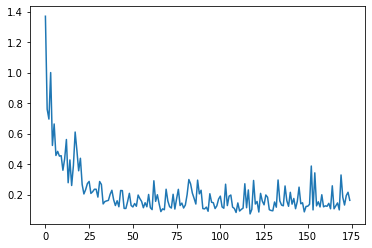

In [8]:
lr = 0.02

print(y_train.shape)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)